ANALISI DIFFUSIONE COVID-19

1 - SI RICHIEDE DI VERIFICARE LE DIMENSIONI DEL DATASET E I RELATIVI METADATI

2 - SI RICHIEDE DI TROVARE, PER CONTINENTE:
         A - IL NUMERO DI CASI FIN DALL'INIZIO DELLA PANDEMIA
         B - LA PERCENTUALE RISPETTO AL TOTALE MONDIAL DEL NUMERO DI CASI

 3 - SELEZIONARE I DATI RELATIVI ALL'ITALIA NEL 2022 E, POICHE I NUOVI CASI VENGONO REGISTRATI SETTIMANALMENTE, FILTRARE VIA I GIORNI CHE NON HANNO MISURAZIONE, QUINDI MOSTRARE CON DEI GRAFICI ADEGUATI

     A - L'EVOLUZIONE DEI CASI TOTALI DALL'INIZIO ALLA FINE DELL'ANNO
     B - IL NUMERO DI NUOVI CASI RISPENTTO ALLA DATA


4 - RIGUARDO LE NAZIONI DI ITALIA, GERMANIA E FRANCIA:

    A - MOSTRARE IN UN BOXPLOT LA DIFFEERNZA TRA QUESTE NAZIONI RIGUARDO IL NUMERO DI PAZIENTI IN TERAPIA INTENSIVA (INTENSIVE CARE UNIT, ICU,CONSIDERARE QUINDI LA COLONNA ICU_PATIENTS), DA MAGGIO 2022 (INCLUSO) AD APRILE 2023 (INCLUSO)
    B - SCRIVERE UN BREVE COMMENTO (UNA O 2 RIGHE) RIGUARDO CHE CONCLUSIONI POSSIAMO TRARRE OSSERVANDO IL GRAFICO RISULTANTE

5 - RIGUARDO LE NAZIONI DI ITALIA, GERMANIA, FRANCIA E SPAGNA IN TUTTO IL 2021:

    A - MOSTRARE, IN MANIERA GRAFICA OPPURE NUMERICA, LA SOMMA DEI OAZIENTI OSPEDALIZZATI PER OGUNO(COLONNA HOSP_PATIENTS)
    B - SE CI SONO DATI NULLI, CON UN BREVE COMMENTO SCRIVERE SE PUò ESSERE POSSIBILE GESTIRLI TRAMITE SOSTITUZIONE O MENO
    

In [4]:
# 1 - SI RICHIEDE DI VERIFICARE LE DIMENSIONI DEL DATASET E I RELATIVI METADATI

import pandas as pd

# Carica il dataset
df = pd.read_csv('owid-covid-data.csv')

# Dimensioni del dataset (righe, colonne)
print('Dimensioni del dataset:', df.shape)


Dimensioni del dataset: (429435, 67)


In [5]:
# Metadati: elenco delle colonne
print('\nColonne disponibili:')
print(df.columns.tolist)


Colonne disponibili:
<bound method IndexOpsMixin.tolist of Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
     

In [6]:
# Informazioni generali sulle colonne
print('\nInfo dataset:')
print(df.info())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-

2 - SI RICHIEDE DI TROVARE, PER CONTINENTE:
         A - IL NUMERO DI CASI FIN DALL'INIZIO DELLA PANDEMIA

In [43]:
# Filtro solo i record con continenti
df_continente = df[df['continent'].notna()]

# Calcolo dei casi per continente (valore massimo cumulativo)
tot_casi_continente = df_continente.groupby('continent')['total_cases'].max().sort_values(ascending=False)

print('Numero di casi totali dall'inizio della pandemia per continente:')
print(tot_casi_continente)



Numero di casi totali dall'inizio della pandemia per continente:
continent
North America    103436829.0
Asia              99373219.0
Europe            38997490.0
South America     37511921.0
Oceania           11861161.0
Africa             4072765.0
Name: total_cases, dtype: float64


 B - LA PERCENTUALE RISPETTO AL TOTALE MONDIAL DEL NUMERO DI CASI

In [44]:
df_continenti = df[df['continent'].notna()]

tot_casi_continente = df_continenti.groupby('continent')['total_cases'].max()

#Calcolo dei casi mondiale
tot_casi_mondiale = df[df['location'] == 'World']['total_cases'].max()

# % dei casi rispetto al totale mondiale
perc_continente = (tot_casi_continente / tot_casi_mondiale) * 100

sommario = pd.DataFrame({
    'Casi totali': tot_casi_continente.astype(int),
    'Percentuale sul totale mondiale': perc_continente.round(2).astype(str) + '%'

})

print(sommario)


               Casi totali Percentuale sul totale mondiale
continent                                                 
Africa             4072765                           0.52%
Asia              99373219                          12.81%
Europe            38997490                           5.03%
North America    103436829                          13.33%
Oceania           11861161                           1.53%
South America     37511921                           4.83%


3 - SELEZIONARE I DATI RELATIVI ALL'ITALIA NEL 2022 E, POICHE I NUOVI CASI VENGONO REGISTRATI SETTIMANALMENTE, FILTRARE VIA I GIORNI CHE NON HANNO MISURAZIONE, QUINDI MOSTRARE CON DEI GRAFICI ADEGUATI

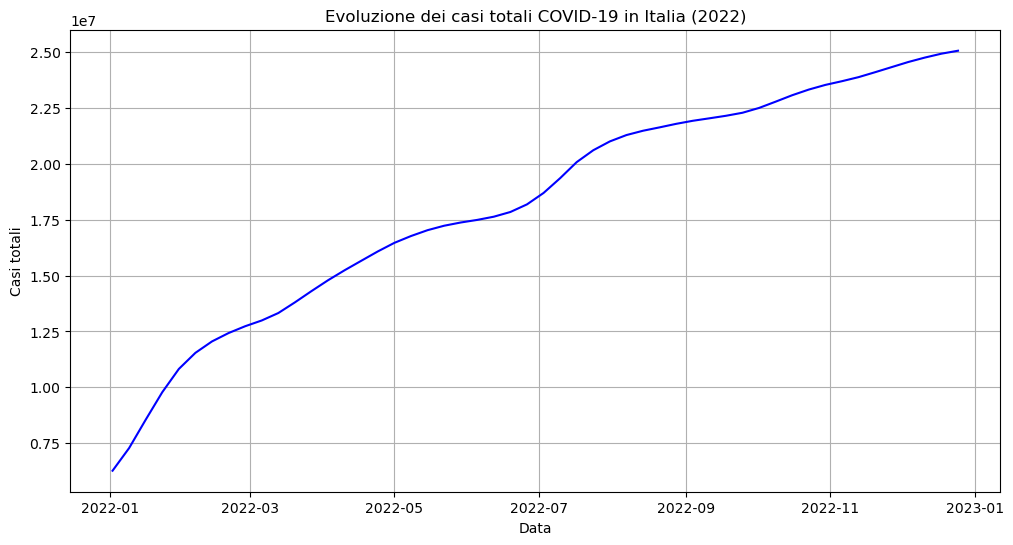

In [46]:
# A - L'EVOLUZIONE DEI CASI TOTALI DALL'INIZIO ALLA FINE DELL'ANNO

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

# filtro dati Italia e anno 2022
Italia_2022 = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]
# solo le settimane con misurazioni > 0)
Italia_2022 = Italia_2022[Italia_2022['new_cases'] > 0]


# Grafico
plt.figure(figsize=(12,6))
plt.plot(Italia_2022['date'], Italia_2022['total_cases'], color='blue')
plt.title('Evoluzione dei casi totali COVID-19 in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.grid(True)
plt.show()


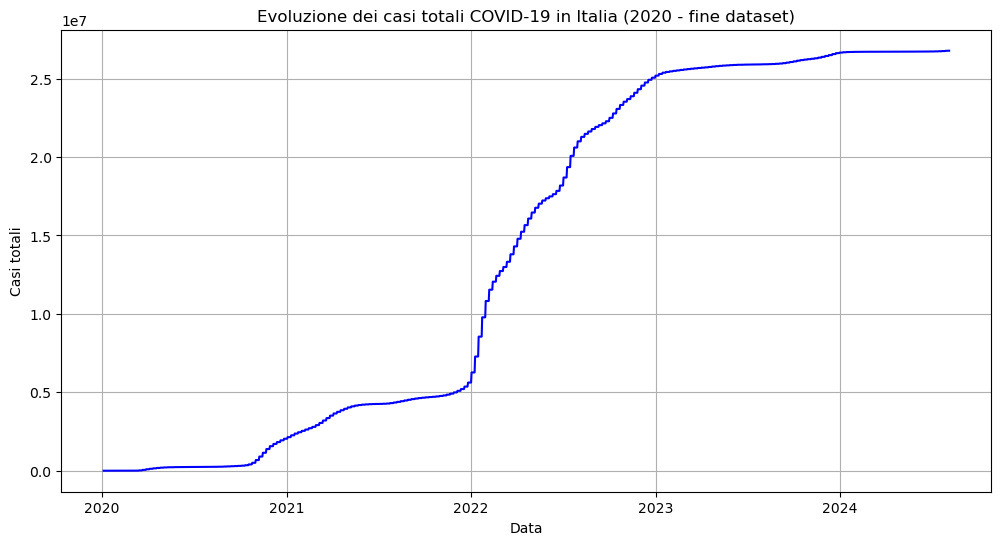

In [47]:

italy_df = df[df['location'] == 'Italy']


plt.figure(figsize=(12,6))
plt.plot(italy_df['date'], italy_df['total_cases'], color='blue')
plt.title('Evoluzione dei casi totali COVID-19 in Italia (2020 - fine dataset)')
plt.xlabel('Data')
plt.ylabel('Casi totali')
plt.grid(True)
plt.show()


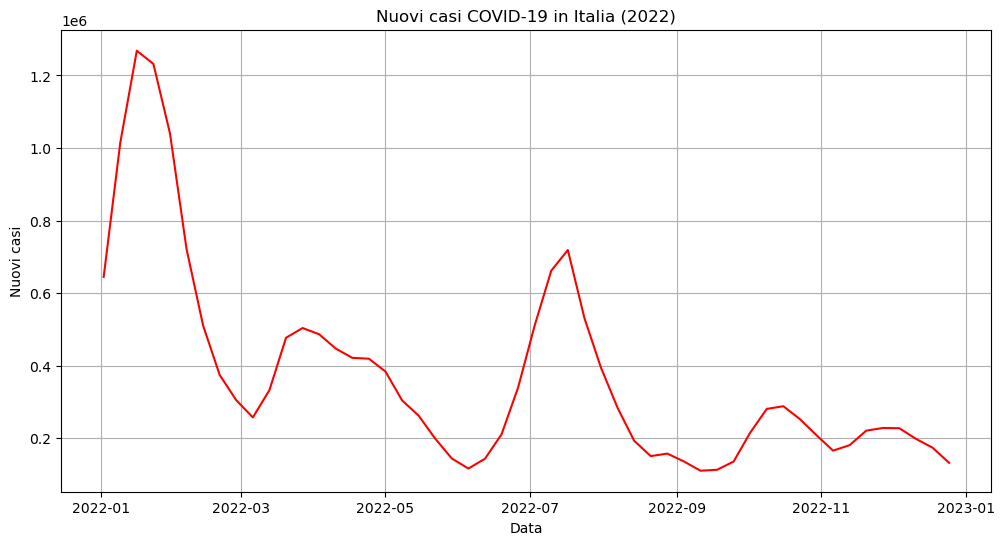

In [28]:
#  B - IL NUMERO DI NUOVI CASI RISPENTTO ALLA DATA
# Grafico nuovi casi
plt.figure(figsize=(12,6))
plt.plot(Italia_2022['date'], Italia_2022['new_cases'], color='red')
plt.title('Nuovi casi COVID-19 in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi casi')
plt.grid(True)
plt.show()


4 - RIGUARDO LE NAZIONI DI ITALIA, GERMANIA E FRANCIA:

    A - MOSTRARE IN UN BOXPLOT LA DIFFEERNZA TRA QUESTE NAZIONI RIGUARDO IL NUMERO DI PAZIENTI IN TERAPIA INTENSIVA (INTENSIVE CARE UNIT, ICU,CONSIDERARE QUINDI LA COLONNA ICU_PATIENTS), DA MAGGIO 2022 (INCLUSO) AD APRILE 2023 (INCLUSO)
    B - SCRIVERE UN BREVE COMMENTO (UNA O 2 RIGHE) RIGUARDO CHE CONCLUSIONI POSSIAMO TRARRE OSSERVANDO IL GRAFICO RISULTANTE

C:\Users\mrand\AppData\Local\Temp\ipykernel_10556\2745078525.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='icu_patients', data=df_periodo, palette='Set2')


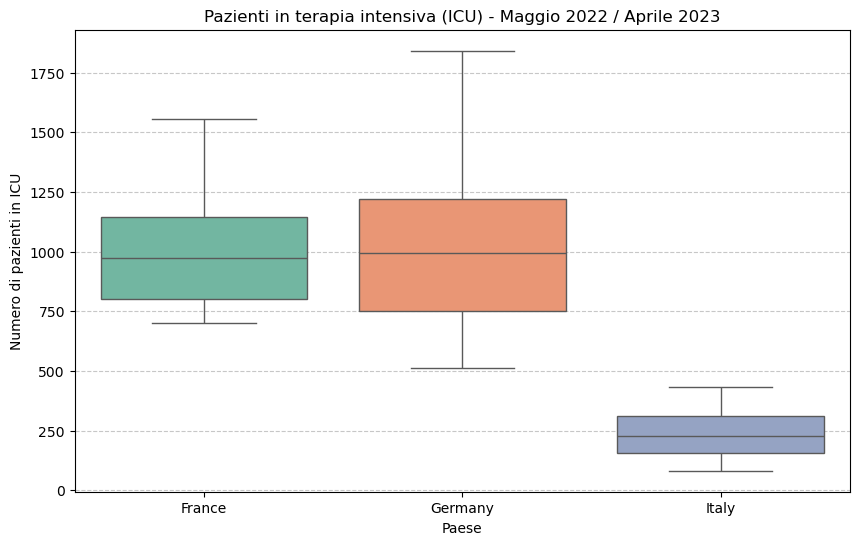

In [37]:
# A - MOSTRARE IN UN BOXPLOT LA DIFFEERNZA TRA QUESTE NAZIONI RIGUARDO IL NUMERO DI PAZIENTI IN TERAPIA INTENSIVA (INTENSIVE CARE UNIT, ICU,CONSIDERARE QUINDI LA COLONNA ICU_PATIENTS), DA MAGGIO 2022 (INCLUSO) AD APRILE 2023 (INCLUSO)

import seaborn as sns
#  filtro dei paesi d'interesse
Paesi = ['Italy', 'Germany', 'France']
df_Paesi = df[df['location'].isin(Paesi)]

# filtro periodo
inizio = '2022-05-01'
fine = '2023-04-30'
df_periodo = df_Paesi[(df_Paesi['date'] >= inizio) & (df_Paesi['date'] <= fine)]

#solo la colonna icu_patients e rimuovi valori nulli
df_periodo = df_periodo[['location', 'icu_patients']].dropna()


plt.figure(figsize=(10,6))
sns.boxplot(x='location', y='icu_patients', data=df_periodo, palette='Set2')

plt.title('Pazienti in terapia intensiva (ICU) - Maggio 2022 / Aprile 2023')
plt.xlabel('Paese')
plt.ylabel('Numero di pazienti in ICU')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()



In [ ]:
#  B - SCRIVERE UN BREVE COMMENTO (UNA O 2 RIGHE) RIGUARDO CHE CONCLUSIONI POSSIAMO TRARRE OSSERVANDO IL GRAFICO RISULTANTE

#Osservando il boxplot si nota che la Germania ha avuto un carico di pazienti in terapia intensiva nettamente superiore, 
#mentre Italia e Francia mostrano valori più contenuti e simili tra loro, 
#evidenziando una pressione ospedaliera meno intensa.



5 - RIGUARDO LE NAZIONI DI ITALIA, GERMANIA, FRANCIA E SPAGNA IN TUTTO IL 2021:

    A - MOSTRARE, IN MANIERA GRAFICA OPPURE NUMERICA, LA SOMMA DEI OAZIENTI OSPEDALIZZATI PER OGUNO(COLONNA HOSP_PATIENTS)

Somma dei pazienti ospedalizzati nel 2021:
location
France     6008717.0
Germany          NaN
Italy      4419950.0
Spain      2411706.0
Name: hosp_patients, dtype: float64


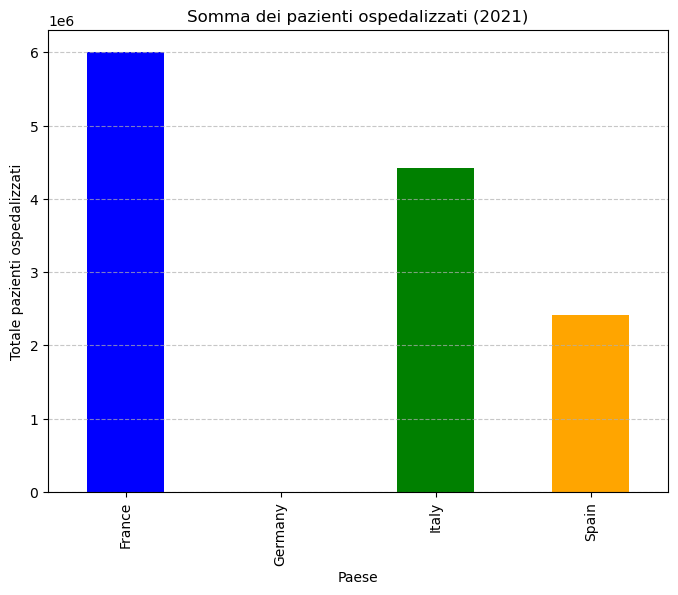

In [41]:
Paesi = ['Italy', 'Germany', 'France', 'Spain']
df_Paesi = df[df['location'].isin(Paesi)]

#filtro solo l'anno 2021
df_2021 = df_Paesi[df_Paesi['date'].dt.year == 2021]

# Somma dei pazienti ospedalizzati per ciascun paese
hosp_sum = df_2021.groupby('location')['hosp_patients'].sum(min_count=1)

print('Somma dei pazienti ospedalizzati nel 2021:')
print(hosp_sum)


plt.figure(figsize=(8,6))
hosp_sum.plot(kind='bar', color=['blue','red','green','orange'])
plt.title('Somma dei pazienti ospedalizzati (2021)')
plt.xlabel('Paese')
plt.ylabel('Totale pazienti ospedalizzati')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# B - SE CI SONO DATI NULLI, CON UN BREVE COMMENTO SCRIVERE SE PUò ESSERE POSSIBILE GESTIRLI TRAMITE SOSTITUZIONE O MENO

- Non è sempre opportuno sostituirli con valori arbitrari perché rischieremmo di falsare l’analisi.
- In questo caso, conviene lasciarli nulli o escluderli dal calcolo delle somme, visto e considerato che rappresentano assenza di misurazione e non “zero pazienti”.
